### keras and Tensorflow > 2.0
#### Steps 
<ol>
    <li>we will collect the stock data</li>
    <li>Preprocess the data - Train and Test</li>
    <li>Create a stacked LSTM model</li>
    <li>Predict the test data and plot the output</li>
    <li>Predict the future 30 days and plot the output</li>
</ol>

In [1]:
## Data Collection
import pandas_datareader as pdr

In [2]:
df = pdr.get_data_tiingo('AAPL',api_key='da2dcaa137a9eb084b74c5c7f6a49661175df139')

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

df = pd.read_csv('AAPL.csv')

In [5]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-02-08 00:00:00+00:00,132.04,132.220,131.22,131.35,23004072,31.028384,31.070683,30.835690,30.866239,92016288,0.00,1.0
1,AAPL,2017-02-09 00:00:00+00:00,132.42,132.445,131.12,131.65,28349859,31.251627,31.257527,30.944822,31.069904,113399436,0.57,1.0
2,AAPL,2017-02-10 00:00:00+00:00,132.12,132.940,132.05,132.46,20065458,31.180825,31.374349,31.164305,31.261067,80261832,0.00,1.0
3,AAPL,2017-02-13 00:00:00+00:00,133.29,133.820,132.75,133.08,23035421,31.456950,31.582032,31.329508,31.407389,92141684,0.00,1.0
4,AAPL,2017-02-14 00:00:00+00:00,135.02,135.090,133.25,133.47,33226223,31.865237,31.881757,31.447510,31.499431,132904892,0.00,1.0


In [6]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-01-31 00:00:00+00:00,174.78,175.0000,169.51,170.160,115541590,174.557234,174.776954,169.293951,169.943123,115541590,0.00,1.0
1254,AAPL,2022-02-01 00:00:00+00:00,174.61,174.8400,172.31,174.010,86213911,174.387451,174.617158,172.090382,173.788216,86213911,0.00,1.0
1255,AAPL,2022-02-02 00:00:00+00:00,175.84,175.8800,173.33,174.745,84914256,175.615883,175.655832,173.109082,174.522279,84914256,0.00,1.0
1256,AAPL,2022-02-03 00:00:00+00:00,172.90,176.2399,172.12,174.480,89418074,172.679630,176.015274,171.900625,174.257617,89418074,0.00,1.0
1257,AAPL,2022-02-04 00:00:00+00:00,172.39,174.1000,170.68,171.680,82465400,172.390000,174.100000,170.680000,171.680000,82465400,0.22,1.0


In [7]:
df.shape

(1258, 14)

In [8]:
df1 = df.reset_index()['close'] 

In [9]:
df1.shape

(1258,)

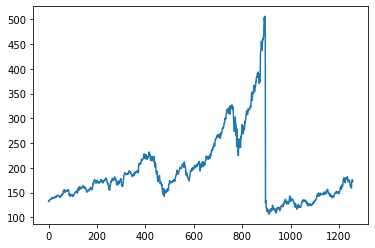

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
# LSTM are sensitive to the scale of the data.So, we apply MinMax Scaler

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
df1

array([[0.06311835],
       [0.06407013],
       [0.06331872],
       ...,
       [0.17282405],
       [0.16546024],
       [0.16418284]])

In [15]:
# Whenever there is timeseries or sequence kind of data the next data is always dependent
# on previous data so we will do the train test split as first 60% or 70% as Train data and
# next 20% or 30% data as Test data

In [17]:
# splitting data into train and test data
training_size = int(len(df1)*0.65) # first 65% are used for training 
test_size = len(df1) - training_size   # other 35% are used for testing
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [18]:
training_size,test_size

(817, 441)

In [20]:
len(train_data),len(test_data)

(817, 441)

In [21]:
# convert an array of values into a dataset matrix
def create_dataset(dataset,timestep=1): # time_step=1 is just to intialize variable as real value we've given is 100
    dataX , dataY = [],[]
    for i in range(len(dataset)-timestep-1):
        a = dataset[i:(i+timestep),0] # i=0, 0f,1,2,3....99  100
        dataX.append(a)
        dataY.append(dataset[i+timestep,0])
    return np.array(dataX) ,np.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3    and Y = t+4
# Basically X takes first 99 element and 100th element pasted into y and so on.
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [26]:
# As we have taken timestep 100 each row of X have 100 feature
print(X_train)
print(X_train.shape) # X has 716 row and 100 column as we have taken timestep=100

[[0.06311835 0.06407013 0.06331872 ... 0.09765811 0.09227301 0.09312461]
 [0.06407013 0.06331872 0.06624922 ... 0.09227301 0.09312461 0.09182217]
 [0.06331872 0.06624922 0.07058234 ... 0.09312461 0.09182217 0.09329994]
 ...
 [0.40095178 0.40485911 0.41059487 ... 0.45307451 0.46827802 0.45643081]
 [0.40485911 0.41059487 0.41232311 ... 0.46827802 0.45643081 0.46667502]
 [0.41059487 0.41232311 0.42156544 ... 0.45643081 0.46667502 0.47769568]]
(716, 100)


In [29]:
X_test.shape

(340, 100)

In [30]:
# reshape input to be [sample, timestep, features] which is required for LSTM
# This step of reshape is required in LSTM models.

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [32]:
# Create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()

# As this is stacked LSTM model we will be adding layers of LSTM
# 1st LSTM layers with 50 hidden layers and in the start we add features
# which we have here total 101 features in X.
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) 
# 2nd LSTM layers with 50 hidden layers
model.add(LSTM(50,return_sequences=True))
# 3rd LSTM layers with 50 hidden layers
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Now we have to fit the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 5s 177ms/step - loss: 0.0254 - val_loss: 0.0045
Epoch 2/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0048 - val_loss: 0.0081
Epoch 3/100
12/12 [==============================] - 1s 114ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 4/100
12/12 [==============================] - 1s 116ms/step - loss: 0.0013 - val_loss: 5.0868e-04
Epoch 5/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0012 - val_loss: 4.2310e-04
Epoch 6/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0011 - val_loss: 7.0776e-04
Epoch 7/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0010 - val_loss: 6.7734e-04
Epoch 8/100
12/12 [==============================] - 1s 115ms/step - loss: 9.6249e-04 - val_loss: 3.9220e-04
Epoch 9/100
12/12 [==============================] - 1s 113ms/step - loss: 8.7867e-04 - val_loss: 4.0170e-04
Epoch 10/100
12/12 [==============================] - 1s 11

Epoch 76/100
12/12 [==============================] - 1s 117ms/step - loss: 3.4767e-04 - val_loss: 2.4334e-04
Epoch 77/100
12/12 [==============================] - 1s 114ms/step - loss: 3.6027e-04 - val_loss: 2.7312e-04
Epoch 78/100
12/12 [==============================] - 1s 113ms/step - loss: 3.8711e-04 - val_loss: 2.0898e-04
Epoch 79/100
12/12 [==============================] - 1s 115ms/step - loss: 3.2178e-04 - val_loss: 3.3106e-04
Epoch 80/100
12/12 [==============================] - 1s 115ms/step - loss: 3.2942e-04 - val_loss: 1.9417e-04
Epoch 81/100
12/12 [==============================] - 1s 115ms/step - loss: 3.1181e-04 - val_loss: 2.6055e-04
Epoch 82/100
12/12 [==============================] - 1s 116ms/step - loss: 3.2533e-04 - val_loss: 2.7329e-04
Epoch 83/100
12/12 [==============================] - 1s 115ms/step - loss: 3.6231e-04 - val_loss: 1.9068e-04
Epoch 84/100
12/12 [==============================] - 1s 114ms/step - loss: 3.8217e-04 - val_loss: 3.2110e-04
Epoch 85/1

In [39]:
# doing prediction
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [40]:
# Now, we are doing performance metrics i.e. RMSE 
# for RMSE we have to inverse transform our train_predict and test_predict
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [41]:
# calculate RMSE performance metrics
# train data RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

205.6924851257417

In [42]:
# test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

141.60894646675465

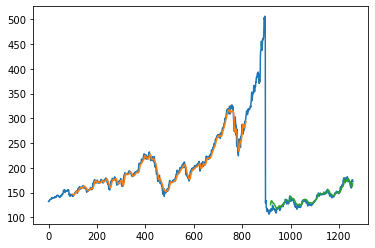

In [54]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
# Predicting the future 30 days output

In [55]:
len(test_data)

441

In [56]:
# now to predict the next day output we have to consider previous 100 days output
x_input=test_data[341:].reshape(1,-1) # we are taking previous 100 output
x_input.shape

(1, 100)

In [58]:
temp_input = list(x_input)  # we are basically converting x_input to list
temp_input = temp_input[0].tolist()

In [59]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

[0.16254056]
101
1 day input [0.10507201 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281
 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317
 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16904195 0.18149029 0.16385723 0.16105197
 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525
 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217 0.17051972
 0.16320601 0.16363181 0.1636819  0.17092048 0.17204759 0.1636819
 0.16588604 0.15769568 0.14875391 0

12 day output [[0.16438419]]
13 day input [0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16904195 0.18149029 0.16385723 0.16105197
 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525
 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217 0.17051972
 0.16320601 0.16363181 0.1636819  0.17092048 0.17204759 0.1636819
 0.16588604 0.15769568 0.14875391 0.14444584 0.13918597 0.13720726
 0.13259862 0.1323732  0.13119599 0.15902317 0.17016907 0.16974327
 0.17282405 0.16546024

24 day output [[0.16151401]]
25 day input [0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16904195 0.18149029 0.16385723 0.16105197
 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525
 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217 0.17051972
 0.16320601 0.16363181 0.1636819  0.17092048 0.17204759 0.1636819
 0.16588604 0.15769568 0.14875391 0.14444584 0.13918597 0.13720726
 0.13259862 0.1323732  0.13119599 0.15902317 0.17016907 0.16974327
 0.17282405 0.16546024 0.16418284 0.16254056 0.16539457 0.16681072
 0.16729514 0.16726413 0.16698904 0.16661926 0.16622458 0.16583222
 0.16545038 0.16508101

In [60]:
# now plotting for next 30 days
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [61]:
len(df1)

1258

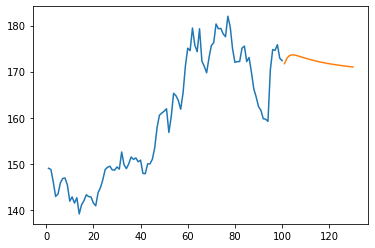

In [62]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:])) # as length of df1 is 1258 so we are taking previous 100 days so it becoms 1158
plt.plot(day_pred,scaler.inverse_transform(lst_output))

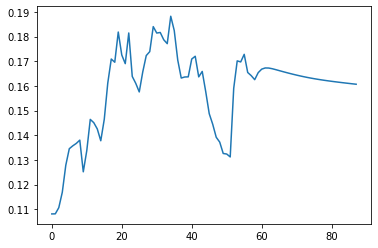

In [63]:
# you can also see
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
# you can also improve this by taking timestep 150
# Or you can take Bidirectional LSTM